# Introduction

Elections are multi-faceted events, and everything from campaigning to the vocabulary in candidate's speeches is carefully chosen [[1](datascience.virginia.edu/projects/text-analysis-2020-us-presidential-election-campaign-speeches), UVA text-analysis of speeches]. However, an often overlooked [[2](https://www.rochester.edu/newscenter/what-is-voter-turnout-voting-behavior-625262/), article explaining voting turnout] aspect of the election is whether or not a U.S. Citizen will actually complete the political process. Our project seeks to address this issue by simply asking whether or not a given person (based on a number of factors) will actually cast their ballot. 

There’s a significance in our potential results: candidates might be more inclined to shift their campaigning efforts to improbable potential voters in hopes to win them over. But also, candidates might opt to cater to the base that they know will vote, depending on their campaign strategy. Beyond a candidate's campaigning, we might also find use in whether or not certain variables have a significant effect on voting likelihood: if race has an impact on a person’s ability to vote, it might be indicative of larger systemic [[3](https://www.vera.org/news/how-systemic-racism-keeps-millions-of-black-people-from-voting), article about systemic racism in voting] issues.

Thus, our main research question is: **can we predict the probability that a voting-eligible person living in the United States will actually vote?**

We'll be attempting to use the following variables to answer that question: year, election type (midterm/presidential), age, race (white/non-white), education (percent of population with bachelor’s degrees or higher) and median (household) income. 

We’ll also consider the following question: **how do voting trends change over time?** For this question, we’ll solely consider year as an input, with voting turnout as the output.

Variables like age, race, education, and income will be interpreted at a state-wide level. While this provides some limitations in terms of specificity (see limitations below), it provides us more data points than considering these variables at a national level, where we’d be limited to just one data point for each year. Including states gives us 50 times as many entries.

**We'll soon see that there are significant correlations between each of the above variables and voting turnout, which is noteworthy in that it allows us to find definitive results to the two questions presented here.**

Our data comes from a myriad of trustworthy sources (see data description below for further details), with the majority being from accredited universities or the U.S. Census bureau.

# Data Description

In general our dataset contains specific demographics for each state in each election year from 2000 to 2022 (excluding 2004 and 2006 where the data was difficult to obtain).

The dataset includes the following columns:

 - `Year`: the given year
 - `State`: the given state
 - `PercentVotingEligibleVotes`: this column specifies the the percent of the voting eligible population that actually voted in a given state for a given year
 - `PercentBachelors`: this column indicates the percentage of the population that has a Bachelor’s degree or higher for a givens state for a given year
 - `Income`: this column specifies the median household income for a given state for a given year
 - `PercentWhite`: this column specifies the percent of the population that is white for a given state for a given year
 - `AverageAge`: this column specifies the average age of the population for a given state in a given year
 - `Presidential`: this column specifies whether the election was a presidential or not (dummy variable with midterm elections being 0)

Below is a description of ***why*** we chose to include some of the key variables within our analysis. 
 - `Year`: Our goal was to track how voting patterns have changed by year as the political environment as well as Americans’ confidence/engagement in the country have continued to shift. It's important (as we'll soon see) to split up elections by their types (midterms/presidential)
 - `State`: States just provide us with more data points for our model - ideally, we'd have a data point for each person, but this isn't possible, so we'll settle for data points for each state.
 - `PercentVotingEligibleVotes`: This is essentially our chosen output value: how likely a person is to vote. By analyzing this at a state level, we get more data points and more accuracy.
 - `PercentBachelors`: We want to see whether literacy has an impact on the likelihood of a given voter participating in the election since level of education may also impact how much someone will pay attention to the news and national events.
 - `Income`: Income might provide a motivation for people to vote (due to taxes, i.e.). Also, income typically is representative of other factors such as education levels, awareness/understanding of the political scene, etc. These factors could affect a person’s desire to vote.
 - `PercentWhite`: Looking into the relationship between diversity within a state and voter turnout trends may shed light on the racism within the voting process in America. People in specific areas may be dissuaded from voting because of systemically racist voting laws or gerrymandering.
 - `AverageAge`: Age is one of the most important factors in electoral studies. There’s a wide belief that voter turnout increases with age as older Americans are less apathetic towards politics and are rather more politically engaged.
 - `Presidential`: Voters tend to have higher turnouts in seemingly more 'important' Presidential elections, as compared to midterms.

 

Here are short descriptions of the data sources (the links and the organizations publishing the links):
 - Voter Turnout Data: [[4](https://www.electproject.org/election-data/voter-turnout-data)]
    - This website was created by Michael P. McDonald, a professor of political science at the University of Florida. It is just a host for the data displayed on the University of Florida's election webpage [[5](https://election.lab.ufl.edu/voter-turnout/)] (so a reputable source). To get the data in the form we wanted, we downloaded 10 CSVs from this site (one for each election) and merged them vertically. The data is usable under the Creative Commons Attribution 3.0 Unported License (with proper citation).

 - Bachelor's Degree or Higher by State: [[6](https://fred.stlouisfed.org/release/tables?rid=330&eid=391444&od=2009-01-01#)] 
 - Real Median Household Income by State: [[7](https://fred.stlouisfed.org/release/tables?rid=249&eid=259515&od=# )]
   - This website is FRED, which is one of the most reputable sources for economic data. To get the data in the form we wanted (merged), we used an importHTML formula in Google Sheets and downloaded that data as a CSV. The data is usable with proper citation, according to the legal notice on the site.

 - Race Makeup by State: [[8](https://www.kff.org/other/state-indicator/distribution-by-raceethnicity/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D)]
 - Age by State: [[9](https://www.kff.org/other/state-indicator/distribution-by-age/?dataView=1&activeTab=graph&currentTimeframe=0&startTimeframe=13&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D)]
    - This website is KFF, which hosts the "most up-to-date and accurate information on health policy". We downloaded the data as a single CSV from this site, and imported it directly into our project. The data in this site is aggregated from the American Community Survey (ACS), and can thus be trusted as accurate, since it is government-based. The data is usable with proper citation, according to the citation page on the site.

Since Age and Race had somewhat limited data available, we supplemented our dataset with the following reliable resources:

 - White percent of population (per state) in 2000: [[10](https://www2.census.gov/library/publications/decennial/2000/briefs/c2kbr01-04.pdf) (Table 2)]
   - This website is the US Census Bureau, which is as formal as it gets for data about US demographics. The data is usable with proper citation, according to the citation page on the site. We simply copied the data from Table 2 into our dataset.
 - White percent of population (per state) in 2002: [[11](https://www.equityinhighered.org/indicators/u-s-population-trends-and-educational-attainment/race-and-ethnicity-of-the-u-s-population)]
    - This website is part of the American Council on Education, which is led by “the leaders of approximately 1,600 accredited, degree-granting colleges and universities and higher education-related associations, organizations, and corporations”. The data is originally from the U.S. Census Bureau, and is usable with proper citation.
 - White percent of population (per state) in 2020: [[12](https://en.wikipedia.org/wiki/List_of_U.S._states_by_non-Hispanic_white_population)] 
    - This Wikipedia page contains a table with the white population for each state in 2020. The data is originally from the U.S. Census Bureau [[13](https://www.census.gov/library/visualizations/interactive/race-and-ethnicity-in-the-united-state-2010-and-2020-census.html)], and is usable with proper citation.
 - White percent of population and median age (per state) in 2006: [[14](https://census.hawaii.gov/acs/ACS2006/acs_2006_geo_comp_and_rank/)]
   - This website is the Hawaii State Data Center, the federally official designated source of Census Bureau data for the state of Hawaii. This data source described median age by state in 2006. The Census Bureau page indicates data can be used given proper citation of the Census Bureau as the source of the original data.
 - Median age (per state) in 2000: [[15](https://www.iowadatacenter.org/datatables/UnitedStates/usstagesel2000.pdf)]
    - This site is the State Data Center of Iowa, a coalesced source of population data from the US Census Bureau, Iowa state agencies, and other verified state and federal sources. This is evidently reputable as it’s designated as the US Census Bureau Premier Local Partner. This page is our source for data regarding median age and age groups by state in 2000. As a Census Bureau partner, the State Data Center of Iowa defaults to the U.S. Census Bureau guidelines, meaning the data is usable with proper citation.
 - Median age (per state) in 2020: [[16](https://www2.census.gov/library/publications/decennial/2020/census-briefs/c2020br-06.pdf)]
   - This document is from the US Census Bureau, which is as formal as it gets for data about US demographics. We used the table detailing population by selected age groups within the United States in 2020. The data is usable with proper citation, according to the citation page on the US Census Bureau site.
 -  Percent of Population with Bachelor's Degrees or higher (per state) in 2000: [[17](https://www.iowadatacenter.org/datatables/UnitedStates/ussteducation2000.pdf)]
    - This site is the State Data Center of Iowa, a coalesced source of population data from the US Census Bureau, Iowa state agencies, and other verified state and federal sources. This is evidently reputable as it’s designated as the US Census Bureau Premier Local Partner. This page is our source for data regarding level of education by state in 2000. As a Census Bureau partner, the State Data Center of Iowa defaults to the U.S. Census Bureau guidelines, meaning the data is usable with proper citation.

### Data Descriptions for Data Sheets:

Note that we technically have 3 datasets (see Data Cleaning, below), one for every election all together, and one for each type of election (midterm/presidential). For the ones split by type, the description below is essentially the same, except for the fact that the dataset contains about half as many rows and only has columns relating to Year, State, and PercentVotingEligibleVotes.

 - **Observations and Attributes**: The combined dataset has 469 rows, about one for each state in each year (so 50 states * 10 midterm elections = 500 rows, subtracting some for NAs in certain rows). Each row has the following columns: `State`, `Year`, `PercentVotingEligibleVotes` (what percent of the voting eligible population actually voted), `PercentBachelors` (percent of the population with a bachelor's degree or higher, this is out form of a literacy rate), `Income` (median household), `PercentWhite` (percent of the population that is white), and `AverageAge` (estimated).
 
 - **Creation**: This dataset was created to easily see the influence of certain voting factors over time, by state. By having all the values in one place, this task becomes infinitely easier than trying to compare between 6 different dataframes. Most of the statistics that we use in this project were obtained from governments (**FRED**, **Census.gov**) or professional institutions (**University of Florida**, **KFF.org**) trying to analyze similar results (though not necessarily in relation to voting - the government might want to know stuff about the economy, for example). As a result, **we can trust the data we use in our project**.

 - **Funding**: Similar to the above, funding for the creation of the sites comes from professional, non-partisan institutions (University of Florida, KFF.org) looking to analyze trends or governments (FRED, Census.gov) who require such information to enact effective policy. Personally, our group was not funded to create this merged dataset.

 - **Timing**: The various datasets that we use are all updated most recently in 2022 (since they all contain statistics up until 2022, at least). While this is the most recent update, all of the government created datasets are updated annually (or), since the statistics are collected as such for most years (2020 is an exception for some). The private datasets were aggregated at once (so not updated yearly), but the data that they aggregate from (elections) is created bi-yearly.

 - **Influence**: Since most of our data is basic demographic information, postal surveys and door-to-door interviews were the means of obtaining the information. However, the legal issues behind the census and elections ensures that there will not be too much bias present within our dataset.

 - **Preprocessing**: Preprocessing of the dataset on our end is solely combining different data sets together and adding a few very simple calculations from various columns. Notably, the ```AverageAge``` column is an estimate, and thus should be used with discretion. In general, our preprocessing was simply combining (horizontally and vertically) different data sets. For the actual sources themselves, we imagine that very little data processing was done (aside from a few calculations like percentages), since the sources presented relatively raw data (bad for NaNs, but good for transparency). Note that the Age dataset contains the most preprocessing out of the lot, with ages being grouped into bins (age ranges), which came to that form from the site host (KFF.org) parsing multiple tables from the American Community Survey (ACS). Still, the ACS only presents the data in bins, so the preprocessing even in this case is still limited.

 - **Awareness** Similar to the above, people definitely knew that their data was being collected and used (without identification, of course), but again, the legal implications behind voting in federal and state elections as well as the federal census ensures that there will not be any sort of strong bias.
 
 - **Raw Source**: The final, merged dataset that we use can be found on our GitHub (private, so only our TAs and group members can access): [GitHub Link](https://github.com/nikhilc52/info2950/blob/main/data/election_demographics_final.csv)  


# Data Cleaning

To convert the data from the above sources into the final CSV(s) that we used we performed cleaning in two steps. The first of which is viewable [here](https://github.com/nikhilc52/info2950/blob/main/ElectionDemographics.ipynb). The main steps in this procedure were importing the CSVs (using Google Sheets importHTML as a precursor in certain cases), and then pivoting and left joining the data to have each row represent a unique data point for a given state in a given year. For clarity this procedure resulted in the file '[election_demographics.csv](https://github.com/nikhilc52/info2950/blob/main/data/election_demographics.csv)'.

Following this procedure, as described above, we manually aggregated data for missing years, pasting the values directly into an Excel spreadsheet (containing our ‘final’ CSV from the first cleaning step). For clarity this procedure resulted in the file '[election_demographics_amended.csv](https://github.com/nikhilc52/info2950/blob/main/data/election_demographics_amended.csv)'. 

Once all of these values were pasted, we transitioned to the second cleaning procedure, which mainly involved prepping the data for modeling. The file is viewable [here](https://github.com/nikhilc52/info2950/blob/main/ElectionDemographicsCleaning.ipynb). Essentially, we split the data into two CSVs for our second hypothesis ([election_demographics_midterm.csv](https://github.com/nikhilc52/info2950/blob/main/data/election_demographics_midterm.csv)/[election_demographics_presidential.csv](https://github.com/nikhilc52/info2950/blob/main/data/election_demographics_presidential.csv)), changed some of the units of our columns to obtain more visible coefficients and outputs (instead of getting 0.00001 as a coefficient, we get 0.1, for instance). We also changed the units of our reference variable columns to 0s and 1s, and got rid of columns we no longer needed, based on our exploratory data findings. For the first hypothesis, the data we're importing is visible [here](https://github.com/nikhilc52/info2950/blob/main/data/election_demographics_final.csv).

# Preregistration Statements

**Hypothesis 1:** The probability of a person voting in an election increases if the election is a presidential election (the other option is midterm), if the person is white, if the person has a high education level (bachelor's degree or higher), has a higher income, and is older.

**Analysis:** We will conduct a multivariate linear regression based on inputs and outputs at a state level (this allows us to estimate data on a per-person level, where the data is not available). The output is the probability of a person voting (this is estimated from the voting turnout percentage of each state, which provides more data to work with). The inputs will be the type of election (dummy variable with midterm elections being 0), each state’s white population makeup (%), each state’s population with bachelor’s degrees or higher (%), each state’s median household income, and each state’s mean age. Though these inputs are at a state level, they can be used to estimate an individual person’s likelihood of voting (and how it changes with the inputs). For each β (for each input) we will test whether the β is > 0, rejecting the null hypothesis of there being no correlation between that input and the voting turnout when the p value is < $\frac{0.05}{5} = 0.01$. We arrive at this value by applying a Bonferroni correction, or dividing the initially chosen statistically significant/confidence level (0.05 since this is a one-way test) by the number of hypothesis tests we're running (5).

Analyzing these factors is critical in identifying the socioeconomic trends that affect voting patterns across America. It’s given that voter turnout regularly drops during midterm elections since Americans don’t perceive Congressional elections to be as important. Based on our research, this has been a consistent trend since the 1840s [[18](https://www.pewresearch.org/short-reads/2014/07/24/voter-turnout-always-drops-off-for-midterm-elections-but-why/), Pew Research article on this voting trend] However, there’s disagreement on the statistical significance of this trend with belief that midterms may just lack the “wow factor”, meaning Americans often don’t see the value of voting for representatives. Looking at racial diversity is essential in tracking how structural barriers like voter suppression tactics affect specific racial groups. Observing these trends is the first step in addressing the given disparities. There has been a changing racial makeup of the electorate, but white adults are still historically more likely to be registered to vote. While they still account for the majority of voting population, non-white eligible people still account for the majority of the growth in the electorate since 2000. 76% of the growth in electorate can be accounted to minority growth, primarily within Hispanic and black eligible voters [[19](https://www.pewresearch.org/social-trends/2020/09/23/the-changing-racial-and-ethnic-composition-of-the-u-s-electorate/), Pew Research article on this voting trend]. It’s arguable that education level is the best predictor of whether someone is likely to vote, and this is also tied to other relevant socioeconomic factors like income and race. There’s a growing education gap, and this gap has largely informed American voting patterns, especially in recent elections [[20](https://www.cnn.com/2024/10/14/politics/the-biggest-predictor-of-how-someone-will-vote/index.html), CNN article on eduction voting patterns] across rural versus urban areas. Our idea was that older voters may be more politically informed and possibly more likely to vote with the intent of protecting existing benefits. There's also been significant insight [[21](https://money.usnews.com/money/retirement/aging/articles/why-older-citizens-are-more-likely-to-vote), US News article on age/voting] into the importance of further politically educating youth. **Regardless of the outcome, it will be interesting to observe the trends (or lack thereof) between demographic data and voting turnout, knowing that demographics are so often used in election modeling and campaign strategy. It might also address whether or not there is an issue in the current voting system.**

**Hypothesis 2:** The probability of a person voting in an election increases over time (split between midterm and presidential elections).

**Analysis:** We will conduct a linear regression where the output is the probability of a person voting, per year (this is estimated from the voting turnout percentage of each state per year, which provides more data to work with). The only input will be the election year. We’ll split this model into two parts: one for midterm elections and one for presidential elections, since we know from phase 2 that there is a significant difference between midterm and presidential election turnouts. For this $B_{year}$, we will test whether $B_{year}$ is > 0, rejecting the null hypothesis of there being no correlation when the p value is < 0.05 (with 0.05 as our chosen statistically significant/confidence level), since this is a one-way test.

Tracking voting patterns over time is important in identifying whether Americans are more politically engaged and the degree to which barriers to voting surrounding socioeconomic factors are being addressed. Based on our existing research, we’re confident that our model would illustrate significant results. This was largely based on recency as the 2020 presidential election saw a 66% turnout rate, the largest for any election since 1900 out of a given voting-eligible population [[22](https://www.pewresearch.org/politics/2023/07/12/voter-turnout-2018-2022/), Pew Research article on this voting trend]. Our intention was to see if this represents a noticeable trend in increasing voter turnout over time, or was a one-off occurrence. **Regardless of outcome, it'll be a good way of testing democratic participation over time.**

# Data Analysis and Evaluation of Significance

We're importing standard libraries here.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy.stats import pearsonr
from scipy.stats.mstats import zscore
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

Before we begin, we'll present the following chart, which is to allow the reader further clarity on the distribution of voting turnout percentages across our dataset of states and years (the dependent variable in all our models). With this in mind, some of the evaluation metrics can be further contextualized. Knowing that this distribution is very wide indicates that a good evaluation metric, say RMSE, is around 5 or less. Had the data been more densely packed together, that same RMSE of 5 might not indicated as good of a model.

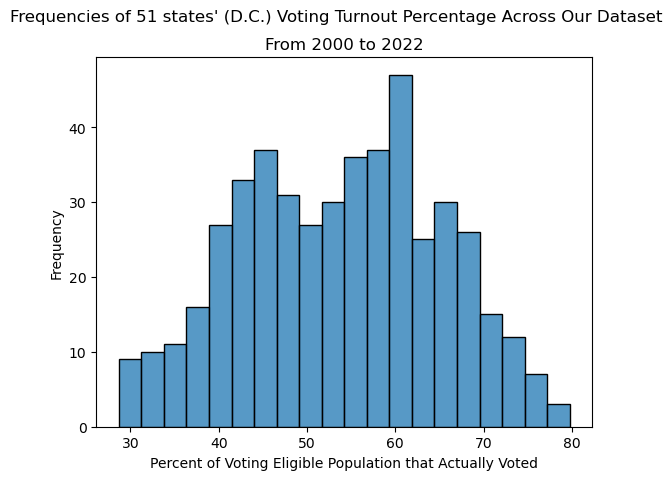

In [ ]:
#read in the data
demographics = pd.read_csv('data/election_demographics_final.csv', index_col=False)

#histogram plot
sns.histplot(demographics['PercentVotingEligibleVotes'], bins=20)
plt.title('From 2000 to 2022')
plt.suptitle('Frequencies of 51 states\' (w/ D.C.) Voting Turnout Percentage Across Our Dataset')
plt.ylabel('Frequency')
plt.xlabel('Percent of Voting Eligible Population that Actually Voted')
plt.show()

## Hypothesis 1

We're now testing hypothesis 1, which is checking correlations between a number of inputs (`Presidential`, `PercentBachelors`, `PercentWhite`, `AverageAge`, `Income`) and the voting turnout (`PercentVotingEligibleVotes`). To do so, we'll use statsmodels.api's OLS model, which is a linear regression that automatically computes key statistics for our coefficients, including p-values and standard errors, which are difficult to obtain by hand.

Note that for now, we're considering the total dataset for our model, since our initial hypothesis is just to test correlations. After we evaluate these for significance, we'll consider a train/test split for generalization.

Also note that we're not including Year in our potential columns, since that will be evaluated by hypothesis 2.

Before we begin our analysis, we need to check for collinearity, which could reduce the strength of some of our coefficients.

In [3]:
#columns to test, this will be used throughout the document
columns = ['Presidential','PercentBachelors','PercentWhite','AverageAge','Income']

#correlation matrix
demographics[columns].corr()

,Presidential,PercentBachelors,PercentWhite,AverageAge,Income
Presidential,1.000000,-0.065470,0.045864,-0.180181,-0.007878
PercentBachelors,-0.065470,1.000000,-0.314596,0.260041,0.749048
PercentWhite,0.045864,-0.314596,1.000000,0.035931,-0.188583
AverageAge,-0.180181,0.260041,0.035931,1.000000,0.051256
Income,-0.007878,0.749048,-0.188583,0.051256,1.000000


From the above, it doesn't appear as if there is any particularly strong correlation between any two column inputs, which means we can input all of them our OLS model without having to remove any. Note that the correlation between `PercentBachelors` and `Income` is slightly high (0.749048), but not strong enough to cause any significant collinearity issues in the following steps.

In [4]:
#creating initial model
x=demographics[columns]
model = sm.OLS(demographics['PercentVotingEligibleVotes'],x).fit()

With our model now in place, we'll check the residual plots of our data to see if there's a need to transform any of the inputs to our model. We're looking for random-looking residual plots here.

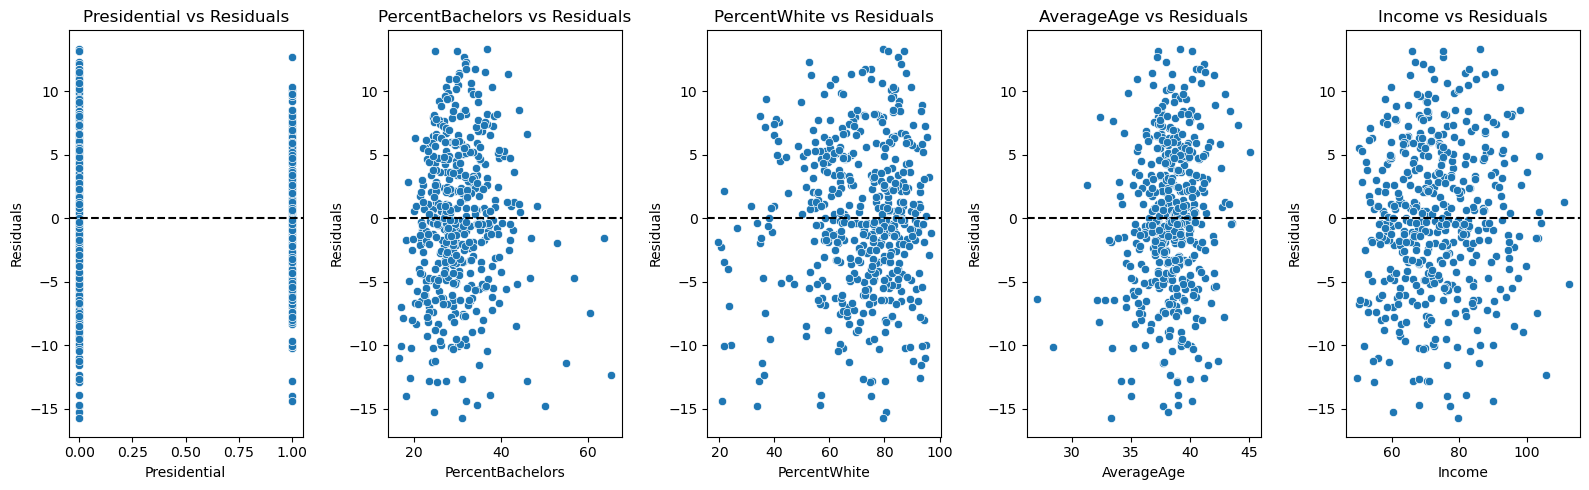

In [5]:
#generate residuals
yhat = model.predict()
residuals = demographics['PercentVotingEligibleVotes'] - model.predict(demographics[columns])

#plot residuals side-by-side for readibility
fig, axes = plt.subplots(1, len(columns), figsize=(16, 5)) 

for ax, x in zip(axes, columns):
    sns.scatterplot(ax=ax, x=demographics[x], y=residuals)
    ax.axhline(y=0, color='black', linestyle='--')
    ax.set_title(f'{x} vs Residuals')
    ax.set_ylabel('Residuals')
plt.tight_layout()
plt.show()

Looking at the above residual plots, they all look fairly random which is good to see, and it indicates that we can consider the inputs to the model as they are: no need to apply a transformation. Note that the `Presidential` vs. Residuals plot looks a little strange, which is because Presidential is a reference variable. Still, the data points look fairly randomly distributed around the two Presidential values.

Remember that each dot here is a state's characteristics in an election.

We'll now look at the summary statistics for the model, evaluating their significance.

In [6]:
# print model stats
print(model.summary())

                                     OLS Regression Results                                    
Dep. Variable:     PercentVotingEligibleVotes   R-squared (uncentered):                   0.988
Model:                                    OLS   Adj. R-squared (uncentered):              0.988
Method:                         Least Squares   F-statistic:                              7906.
Date:                        Sun, 08 Dec 2024   Prob (F-statistic):                        0.00
Time:                                16:52:12   Log-Likelihood:                         -1499.3
No. Observations:                         469   AIC:                                      3009.
Df Residuals:                             464   BIC:                                      3029.
Df Model:                                   5                                                  
Covariance Type:                    nonrobust                                                  
                       coef    std err  

In [7]:
print("More precise p-values:\n")

print(f"Presidential p-value: {model.pvalues.iloc[0]}")
print(f"PercentBachelors p-value: {model.pvalues.iloc[1]}")
print(f"PercentWhite p-value: {model.pvalues.iloc[2]}")
print(f"AverageAge p-value: {model.pvalues.iloc[3]}")
print(f"Income p-value: {model.pvalues.iloc[4]}")

More precise p-values:

Presidential p-value: 8.276364376782804e-117
PercentBachelors p-value: 0.00012330883167853898
PercentWhite p-value: 2.1491658011687077e-20
AverageAge p-value: 1.0463808803248033e-11
Income p-value: 3.4258016192058365e-05


### Evaluation of Significance

For each of the column inputs in this model, we obtain p-values for a T-test that are extremely low. We'll compare each of the p-values for each input to the alpha value of 0.01 (since this is a 1-way, 5-time Bonferroni-corrected test).

Since the p-value of the `Presidential` coefficient is < 0.01 (8.27e-117 < 0.01), we can reject the null hypothesis that there is no correlation between the election type and voting turnout. Since the p-value of the `PercentBachelors` coefficient is < 0.01 (0.0001 < 0.01), we can reject the null hypothesis that there is no correlation between the education level and voting turnout. Since the p-value of the `PercentWhite` coefficient is < 0.01 (2.14e-20 < 0.01), we can reject the null hypothesis that there is no correlation between race and voting turnout. Since the p-value of the `AverageAge` coefficient is < 0.01 (1.04e-11 < 0.01), we can reject the null hypothesis that there is no correlation between age and voting turnout. Since the p-value of the `Income` coefficient is < 0.01 (3.42e-05 < 0.01), we can reject the null hypothesis that there is no correlation between income and voting turnout. 

We can thus form the equation: `PercentVotingEligibleVotes` = 17.246(`Presidential`) + 0.2564(`PercentBachelors`) + 0.1739(`PercentWhite`) + 0.4059(`AverageAge`) + 0.1354(`Income`).

With this in mind we can consider the actual values of the coefficients. 

There is a positive correlation between the election being a Presidential election (as opposed to midterm), corresponding to a 17.2464 in the percent of effective voting turnout in a given state. Since there's no other types of elections (at least that our model considers, we only expect this to hold for Presidential/Midterm national elections). There is another positive correlation between the PercentBachelors (percentage of the population with a Bachelor's degree) and voting turnout. Specifically, with a one unit (1 percent) increase in percent of the population with a Bachelor's degree, there is a 0.2564 unit increase in the percent of voting turnout. There is another positive correlation between the PercentWhite (percentage of the population that is white) and voting turnout. Specifically, with a one unit (1 percent) increase in percent of the population that is white, there is a 0.1739 unit increase in the percent of voting turnout. There is another positive correlation between the AverageAge and voting turnout. Specifically, with a one unit (1 percent) increase in the average age of the population (in years), there is a 0.4059 unit increase in the percent of voting turnout. Finally, there is another positive correlation between the Income (median household income in $1,000s) and voting turnout. Specifically, with a one unit ($1,000) increase in median household income, there is a 0.1354 unit increase in the percent of voting turnout. 

Note that the SE for each of these variables are fairly low (since the units are in terms of voting turnout percentage), the standard error is around 0.1% to 0.5%, which is good for our model and means that our coefficients are precise.

As a whole, these results are important in the larger context of our research. Based on our data and modeling, there is an increased likelihood of a state's voter turnout increasing with education level, whiteness, age, and income. This is indicative of a large problem with voting systems in place. It should certainly not be the case that a factor like race should have a correlation to voting turnout. Obviously, a white person's willingness to vote should be the same as a non-white person's, yet that appears to not be the case, highlighting that there are certain externalities beyond our model that limit different demographics' ability to vote. The same logic can be applied to the other variables. Generally, everyone should have the same willingness to vote, and if they don't, there's likely a larger problem in play, either with two-party politics that produce unexciting candidates or some form of voting discrimination.

As a neat visualization of the inputs of our model, we can plot out our predicted values and the actual values, coloring each data point by an input value. Here, we're not outputting any test statistics or evaluating the model (we do that later using RMSE and MAE), but the visuals below allow for a better understanding of what the model is actually doing.

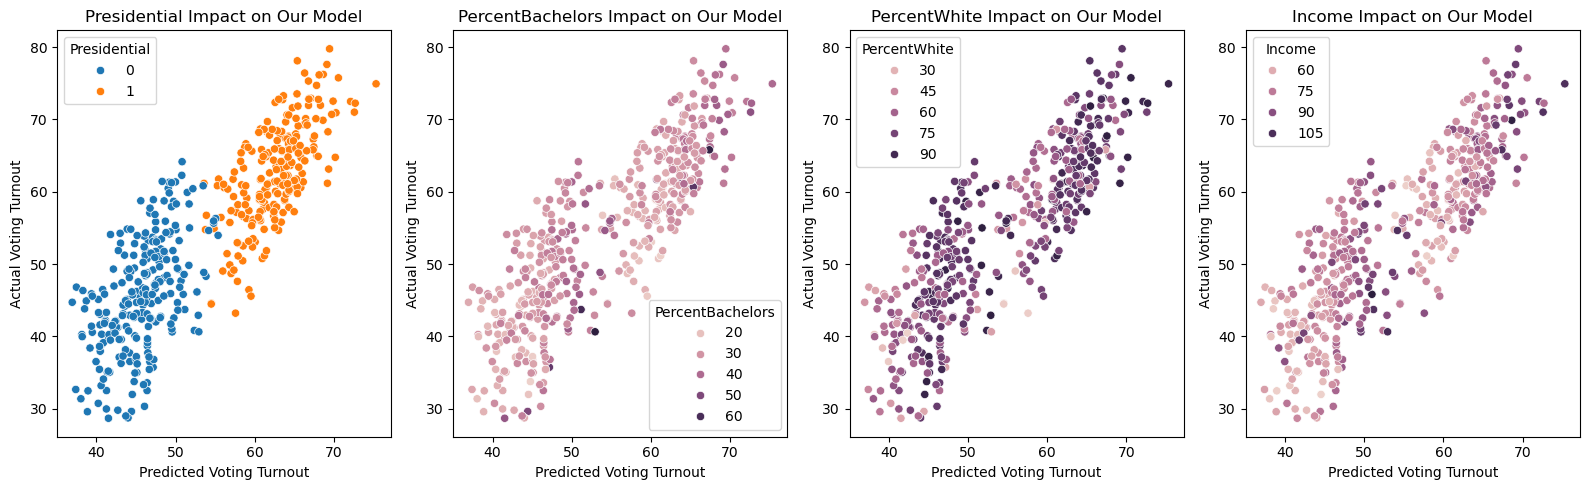

In [8]:
#plotting columns against residuals
plot_columns = ['Presidential','PercentBachelors','PercentWhite','Income']
fig, axes = plt.subplots(1, len(plot_columns), figsize=(16, 5)) 

for ax, x in zip(axes, plot_columns):
    sns.scatterplot(ax=ax, y=demographics['PercentVotingEligibleVotes'], x=model.predict(), hue=demographics[x])
    ax.set_title(f'{x} Impact on Our Model')
    ax.set_xlabel('Predicted Voting Turnout')
    ax.set_ylabel('Actual Voting Turnout')

plt.tight_layout()
plt.show()

Remember that each dot here is a state's predicted/actual voter turnout in an election. We've colored each of the plots based on certain input variables to see how they effect our model, and there's some clear gradients that match up with the positive signs of our coefficients presented earlier. Most noteworthy is the Presidential coloring, which shows a very clear split that our models makes use of for its predictions. 

While we can't easily extract numeric interpretations from these plots, they serve as good supplements for each of the input variables. Note that we didn't use AverageAge here, since the values are all fairly close together, and difficult to see any visible trend. Keep in mind that this is just supplementary material: the more numeric and descriptive statistics and evaluation metrics are below (and also above in our initial evaluation of significance).

While the above model is good for comparing our data to real-world numbers, we can standardize our regression coefficients by standardizing our data in order to assess which of the independent variables have a greater effect on the dependent variable. Standardizing the coefficients means that we must first standardize our data.

In [9]:
#printing a standardized regression model
x=demographics[columns]
print(sm.OLS(zscore(demographics['PercentVotingEligibleVotes']), zscore(x)).fit().summary())

                                     OLS Regression Results                                    
Dep. Variable:     PercentVotingEligibleVotes   R-squared (uncentered):                   0.734
Model:                                    OLS   Adj. R-squared (uncentered):              0.731
Method:                         Least Squares   F-statistic:                              255.4
Date:                        Sun, 08 Dec 2024   Prob (F-statistic):                   9.56e-131
Time:                                16:52:13   Log-Likelihood:                         -355.36
No. Observations:                         469   AIC:                                      720.7
Df Residuals:                             464   BIC:                                      741.5
Df Model:                                   5                                                  
Covariance Type:                    nonrobust                                                  
                       coef    std err  

Looking at our model results, we see that each of the p-values still indicate significant results at an alpha=0.01 level. More importantly, though, is the absolute values of each of the coefficients. Since we've standardized our data, we've made the units of our model the same for each (unitless), meaning we can directly extract a ranking of the importance of each input in predicting voter turnout. We see that the election being of type "Presidential" is the biggest predictor for whether or not a person will vote (highest coefficient of 0.7820). Of the demographic categories, which are more important for real-world analysis, we see that race is the biggest factor (coefficient of 0.2645, meaning a 1 SD increase in the percent of the population that is white corresponds to a 0.2645 SD increase in the voter turnout). After race, we have education, age, and interestingly income following suit. The difference between race and income's influence on voting is particularly interesting, the debate between whether people are more divided by class or race [[23](https://www.washingtonpost.com/news/monkey-cage/wp/2016/10/12/how-do-race-ethnicity-and-class-shape-american-political-attitudes-heres-our-data/), Washington Post article describing this debate] is very divisive. However, in this case, it appears that race is a bigger divider (in this case, divider can be used interchangeably with predictor, since bigger dividers are likely to be bigger predictors) in terms of political participation.

Also, as stated before, the result of race being a significant predictor of voting turnout (and more significant than others) indicates that, assuming people of different races are equally likely to vote, that there are systemic inequalities that prevent certain people of certain races from voting, or that our political system is built in a way that disincentives certain demographics from voting (by producing uninspiring candidates, for example). 

As an addendum to our first hypothesis, and to better answer our research question and its purpose, we can run a train/test split on our data to obtain metrics about generalization. Here, we're using Cross Validation since we want to test if our model can generalize well: while our above analysis shows significance, it wouldn't be a useful tool for potential candidates in the future, who would be using it on completely new data.  

Since were using an OLS model, we can manually create our CV, setting aside 30% of our data as a final test, and partitioning the rest of the data 6 times to obtain metrics that we can use to evaluate generalizability. Note that we're setting a random state so that we can continue to run this without obtaining different metrics each time.

In [10]:
#train/test split generation
demographics_train, demographics_test = train_test_split(demographics, test_size=0.3, random_state=2950) 

With our train and test data in place, we'll use KFold to obtain validation sets, refitting the model on each of these sets, and evaluating its effectiveness with MAE and RMSE. At the end, we'll print those metrics out to comprehend them.

In [11]:
#get the X and the y for our training data only (reserve test data for later)
X=demographics_train[columns]
y=demographics_train['PercentVotingEligibleVotes']

#generate 6 folds
kf = KFold(n_splits=6, shuffle=False)

maes = []
rmses = []
#for each fold, generate an according train/validation set, and use the model to fit 6 times
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = sm.OLS(y_train, X_train).fit()
    pred_y = model.predict(X_test)

    #append model stats
    mae = np.mean(np.abs(y_test - pred_y))
    rmse = np.sqrt(np.mean(np.square(y_test - pred_y)))
    print(f"The MAE in this split was {round(mae,4)} and the RMSE was {round(rmse,2)}")
    maes.append(mae)
    rmses.append(rmse)

#format and print each statistic for evaluation
print()
print("Average MAE:", round(np.mean(maes),4))
print("Variance of the MAE:", round(np.var(maes),4))
print("Standard Deviation of the MAE:", round(np.std(maes),4))
print()
print("Average RMSE:", round(np.mean(rmses),4))
print("Variance of the RMSE:", round(np.var(rmses),4))
print("Standard Deviation of the RMSE:", round(np.std(rmses),4))

The MAE in this split was 4.9208 and the RMSE was 6.1
The MAE in this split was 4.2805 and the RMSE was 5.4
The MAE in this split was 4.7193 and the RMSE was 5.83
The MAE in this split was 5.1414 and the RMSE was 6.24
The MAE in this split was 5.7175 and the RMSE was 7.42
The MAE in this split was 5.6346 and the RMSE was 6.81

Average MAE: 5.069
Variance of the MAE: 0.252
Standard Deviation of the MAE: 0.502

Average RMSE: 6.3
Variance of the RMSE: 0.4292
Standard Deviation of the RMSE: 0.6551


The Average MAE, or Mean Absolute Error, was 5.069 percentage units, which, given the chart presented at the beginning of the notebook which shows a wide distribution of percentages is very good. This essentially means that the the average difference between predicted and actual values is a mere 5 percentage points. A similar explanation can be applied to RMSE, which is the root mean squared error, another way of measuring the average difference between predicted and actual values, weighing outliers more heavily. As such, it makes sense that RMSE is a bit higher than the MAE, since outliers are likely to have caused this to occur.

More important than the test metric averages are their variances, which in this context, allows us to evaluate how well our model generalizes. Since our evaluation metrics have very low variance (and standard deviations) across CV folds, we can trust our model to perform consistently well across out-of-sample data. 

With overfitting now ruled out, we can train our model using the previously defined train/test split, and test our metrics on our unseen test set.

In [12]:
#make a new model using the full training
model = sm.OLS(demographics_train['PercentVotingEligibleVotes'], demographics_train[columns]).fit()

#print stats against the train/test sets
print(f"Train RMSE: {round(root_mean_squared_error(demographics_train['PercentVotingEligibleVotes'],
      model.predict(demographics_train[columns])),5)}")
print(f"Test RMSE: {round(root_mean_squared_error(demographics_test['PercentVotingEligibleVotes'],
      model.predict(demographics_test[columns])),5)}")
print('')
print(f"Train MAE: {round(mean_absolute_error(demographics_train['PercentVotingEligibleVotes'],
      model.predict(demographics_train[columns])),5)}")
print(f"Test MAE: {round(mean_absolute_error(demographics_test['PercentVotingEligibleVotes'],
      model.predict(demographics_test[columns])),5)}")

Train RMSE: 6.16521
Test RMSE: 5.34915

Train MAE: 4.97803
Test MAE: 4.22426


Once again, the fact that the RMSE's and MAE's for both train/test sets are similar is further evidence that we can generalize our results: we get similar errors in train/test datasets. However, since the training set has a higher RMSE as compared to the test set, this might indicate some evidence for random noise or that the test set might be easier to predict compared to the training set, possibly due to the random splits in the test/train set we assigned earlier. Nonetheless, we obtain fairly low errors for both datasets, with a prediction of voting turnout being off by a mere 5% or so for any given state in any given year.

Having this model directly addresses our research question: based on a given person's surrounding state demographics, we can fairly accurately predict their state's likelihood to vote, and thus their own likelihood to vote using a model that has the potential to generalize to other, new elections.

## Hypothesis 2

Note that this first hypothesis and the corresponding model did not include year as an input (since it caused collinearity in the model). So, we'll split that section of our research question into this hypothesis. Note that we're using two different datasets now, one for only presidential elections, and the other for only midterm elections. This allows us to have two different models, one for each election type.

In [13]:
#read in the dfs
demographics_presidential = pd.read_csv('data/election_demographics_presidential.csv')
demographics_midterm = pd.read_csv('data/election_demographics_midterm.csv')

#make a presidential model
x=sm.add_constant(demographics_presidential['Year'])
presidential_model = sm.OLS(demographics_presidential['PercentVotingEligibleVotes'],x).fit()

The above is repeated for midterm elections:

In [14]:
#make a midterm model
x=sm.add_constant(demographics_midterm['Year'])
midterm_model = sm.OLS(demographics_midterm['PercentVotingEligibleVotes'],x).fit()

Before we continue, we'll plot our residual plots to see if we need to apply any sort of transformation to our input data. We're looking to see if the residuals look random.

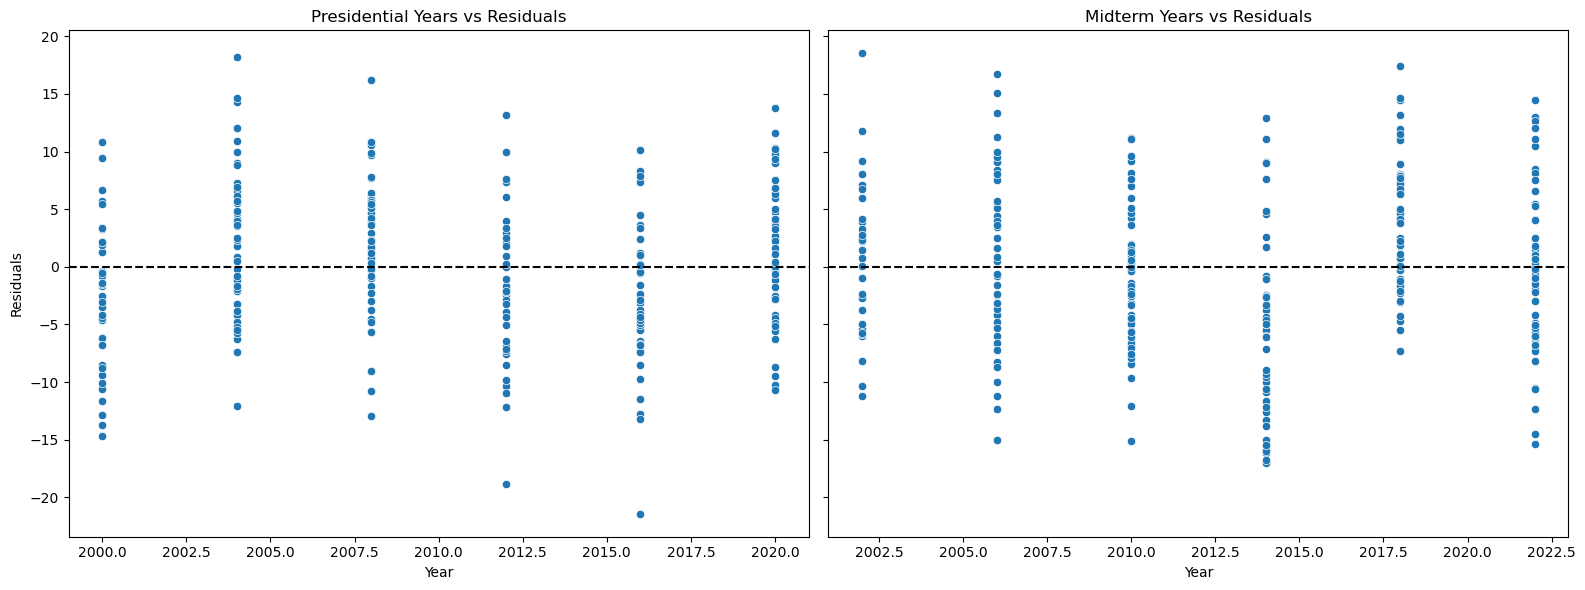

In [15]:
#plot the residuals for both models
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

residuals = demographics_presidential['PercentVotingEligibleVotes'] - presidential_model.predict()
sns.scatterplot(ax=axes[0], x=demographics_presidential['Year'], y=residuals)
axes[0].axhline(y=0, color='black', linestyle='--')
axes[0].set_title('Presidential Years vs Residuals')
axes[0].set_ylabel('Residuals')
axes[0].set_xlabel('Year')

residuals = demographics_midterm['PercentVotingEligibleVotes'] - midterm_model.predict()
sns.scatterplot(ax=axes[1], x=demographics_midterm['Year'], y=residuals)
axes[1].axhline(y=0, color='black', linestyle='--')
axes[1].set_title('Midterm Years vs Residuals')
axes[1].set_ylabel('Residuals')
axes[1].set_xlabel('Year')

plt.tight_layout()
plt.show()

While the residual plots look a bit strange since we're dealing with discrete data, the general distributions that the points follow is random, so we can conclude that we don't need to transform our data.

We'll now look at the actual values and coefficients for the model. Note that in both the models below, there is a very high condition number. This isn't a result of collinearity [[24](https://stats.stackexchange.com/questions/332428/regression-model-constant-causes-multicollinearity-warning-but-not-in-standardi), Stack Overflow description of this solution] like the output states, but rather a result of awkward scaling, so it's generally not a problem for our application.

**Presidential:**

In [16]:
#print model stats
print(presidential_model.summary())

                                OLS Regression Results                                
Dep. Variable:     PercentVotingEligibleVotes   R-squared:                       0.110
Model:                                    OLS   Adj. R-squared:                  0.107
Method:                         Least Squares   F-statistic:                     33.24
Date:                        Sun, 08 Dec 2024   Prob (F-statistic):           2.23e-08
Time:                                16:52:14   Log-Likelihood:                -891.14
No. Observations:                         271   AIC:                             1786.
Df Residuals:                             269   BIC:                             1793.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

**Midterm:**

In [17]:
#print model stats
print(midterm_model.summary())

                                OLS Regression Results                                
Dep. Variable:     PercentVotingEligibleVotes   R-squared:                       0.049
Model:                                    OLS   Adj. R-squared:                  0.045
Method:                         Least Squares   F-statistic:                     14.13
Date:                        Sun, 08 Dec 2024   Prob (F-statistic):           0.000208
Time:                                16:52:14   Log-Likelihood:                -956.42
No. Observations:                         279   AIC:                             1917.
Df Residuals:                             277   BIC:                             1924.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [18]:
print("More precise p-values:\n")

print(f"Presidential p-value: {presidential_model.pvalues.iloc[0]}")
print(f"Midterm Year p-value: {round(midterm_model.pvalues.iloc[0],5)}")

More precise p-values:

Presidential p-value: 3.432863205331258e-07
Midterm Year p-value: 0.00071


### Evaluation of Significance

Both OLS models were trained on the input `Year` (presidential and midterm years respectively) and the output `PercentVotingEligibleVotes`. Using an alpha value of 0.05, since this is a one-way test (testing to see if the coefficients are > 0), we can compare the p-value of 3.4329e-07 to this alpha (for the presidential model). We can reject the null hypothesis that there is no relationship between the election year and voter turnout given that the p-values are < 0.05. Similarly, we can reject the null at the 0.05 significance level for the midterm model, since the p-value of 0.00071 < 0.05.

For the presidential model, we obtained a coefficient of 0.3352. This means that for every subsequent year, voter turnout increases by 0.3352 units (percentage points). For the sake of our interpretation, we care more about the increase in voter turnout every 4 years, since presidential elections only occur every 4 years. Thus, for every subsequent presidential election (every 4 years) voter turnout increases by 1.3408 percentage points. 

For the midterm model, we obtained a coefficient of 0.2547. This means that for every subsequent year, voter turnout increases by 0.2547 percentage points. For the sake of our interpretation, we care more about the increase in voter turnout every 4 years, since midterms occur by themselves every 4 years. Thus, for every subsequent midterm election without a presidential election occurring (every 4 years) voter turnout increases by 1.0188 percentage points. 

The fact that both coefficients are positive is a good sign for politics. To have more people vote an participate in the democratic process is never a bad thing. However, it is noteworthy that Presidential voting turnout seems to be growing at a higher rate than midterm election turn out. This matches with our own intuitions about election results and the public's perception of the importance of different election types. 

Comparing this to our results from hypothesis 1, these prove a bit more optimistic. Here, we see that there's a general increase in political participation over time, which *might* be indicative of the political issues identified in hypothesis 1 being improved on, at least marginally, over time.

Below is a plot of our model against the national average for voter turnout, using data from one of the sources [[4](https://www.electproject.org/national-1789-present)] already described in our data descriptions sheet (just a different spreadsheet on the site). This plot is purely to understand how our model matches up and correlates to actual data that it did not have access to (the model only used per-state turnout, not nationwide), which diversifies our evaluation metrics and sees if the trend holds up at a national level.

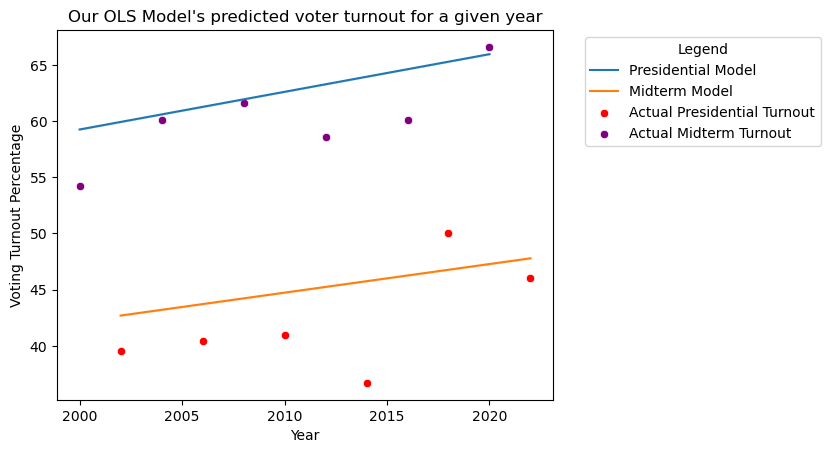

In [19]:
#actual midterm data parsed from above source
actual_voter_turnout_midterm = [39.5,40.4,41,36.7,50,46]
actual_voter_turnout_year_midterm = list(range(2002,2023,4))

#actual presidential data parsed from above source
actual_voter_turnout_presidential = [54.2,60.1,61.6,58.6,60.1,66.6]
actual_voter_turnout_year_presidential = list(range(2000,2021,4))

#plotting our model against actual data
sns.lineplot(x=demographics_presidential['Year'],y=presidential_model.predict(), 
             label="Presidential Model")
sns.lineplot(x=demographics_midterm['Year'],y=midterm_model.predict(), 
             label="Midterm Model")
sns.scatterplot(x=actual_voter_turnout_year_midterm,y=actual_voter_turnout_midterm, color='red', 
                label="Actual Presidential Turnout")
sns.scatterplot(x=actual_voter_turnout_year_presidential,y=actual_voter_turnout_presidential, color='purple', 
                label="Actual Midterm Turnout")
plt.ylabel('Voting Turnout Percentage')
plt.title('Our OLS Model\'s predicted voter turnout for a given year')
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Looking above, we can see that our model does fairly well on this data, with clear trends of election turnout percentages matching up with our own predictions. More specifically, we can evaluate this relationship using a Pearson Correlation, which can be used to understand linear relations.

In [20]:
presidential_years = [[1,2000],[1,2004],[1,2008],[1,2012],[1,2016],[1,2020]]
presidential_corr, _ = pearsonr(presidential_model.predict(presidential_years), actual_voter_turnout_presidential)

midterm_years = [[1,2002],[1,2006],[1,2010],[1,2014],[1,2018],[1,2022]]
midterms_corr, _ = pearsonr(midterm_model.predict(midterm_years), actual_voter_turnout_midterm)

print(f"Pearson correlation for presidential years: {round(presidential_corr,3)}")
print(f"Pearson correlation for midterm years: {round(midterms_corr,3)}")

Pearson correlation for presidential years: 0.781
Pearson correlation for midterm years: 0.629


With Pearson correlations between 0.6 and 0.8 for both models, we see that there is a moderately strong relationship between our model's state predictions and the actual national voter turnouts. This intuitively makes sense: the states makeup the nation after all, so the national data should correlate with the aggregated state data that we built the model from. Still, it's good to see the data back that intuition up (and the trend be somewhat visible at the national level).

Going back to our research question, this model directly answers our second one. Yes, voting trends have changed over time, specifically, they have generally increased over the years.  

# Conclusions

The reasoning behind our analysis for this project was to answer our research question: Can we predict the probability that a voting-eligible person living in the United States will actually vote? To answer this research question, we came up with two hypotheses to see what our data gives evidence to. 

Hypothesis 1: The probability of a person voting in an election increases if the election is a presidential election (the other option is midterm), if the person is white, if the person has a high education level (bachelor's degree or higher), has a higher income, and is older.

For Hypothesis 1, we fitted a linear regression model predicting the voter turn out (`PercentVotingEligibleVotes`) with election type (`Presidential`), education level (`PercentBachelors`), race (`PercentWhite`), age (`AverageAge`), and average income (`Income`). We also checked to make sure that there was no collinearity between these variables by find the relationship between each other. This made us confident that each variable we chose were significant and had no overlapping significance with each other. 

From this model, we were able to determine that we should reject the null hypothesis that there is no relationship between voter turnout and each of the inputs/variables because the p-value for each input was < 0.01 (Bonferroni adjusted). 

Diving more into the numbers, we found out that there exists a positive relationship between voter turnout (`PercentVotingEligibleVotes`) and election type, education level, race, age, and income. Below is the significance of the coefficients we found for each variable from our OLS model.
- election type (`Presidential`): 17.246 $\Rightarrow$ an election being presidential increased the probability that a person voted by 17.246 percentage points.
- education level (`PercentBachelors`): 0.2564 $\Rightarrow$ a one percentage increase in a state's population having bachelors degrees increased the probability that a person in that state voted by 0.2564 percentage points. 
- race (`PercentWhite`): 0.1739 $\Rightarrow$ a one percent increase in a state's population of its white racial demographic increased the probability that a person in that state voted by 0.1739 percentage points.
- age (`AverageAge`): 0.4059 $\Rightarrow$ a one percent increase in a state's average age increased the probability that a person in that state voted by 0.4059 percentage points.
- income (`Income`): 0.1354 $\Rightarrow$ a one percent increase in a state's average income increased the probability that a person in that state voted by 0.1354 percentage points.

More evidence that our model was accurate was found during our KFold testing:
- Average MAE: 5.069, Variance of the MAE: 0.252
- Average RMSE: 6.3, Variance of the RMSE: 0.4292

The significance of this result was that we were able to prove that there does exist a relationship between all of these variables and voter turnout. This allowed us to answer our research question of whether or not we can predict the probability of a person voting. To put it simply, yes, we can make this prediction, since the probability of a person voting does in fact increase (significantly) with a number of factors. Furthermore, we obtain a low MAE and RMSE meaning our model/prediction is fairly accurate as well, and able to generalize to unseen data given our low test score variance. 

Note that we were unable to truly predict voting likelihoods based on individual characteristics, but can predict likelihoods based on surrounding characteristics. For example, we can't predict a likelihood based on if a person is white, but can reason about race based on the racial makeup of their surrounding area/state. Nonetheless, based on certain characterizing inputs, we can obtain a likelihood value. 

All in all, our data analysis was able to find strong indications that election type, education level, race, age, and income are all variables that can be used to predict the probability that an eligible voter actually voted. 

Hypothesis 2: The probability of a person voting in an election increases over time (split between midterm and presidential elections).

For Hypothesis 2, we fitted two linear regression models, split by midterm and presidential elections. They both predicted the voter turn out (`PercentVotingEligibleVotes`) based on a given Year (`Year`). 

From both models, we were able to determine that we should reject the null hypothesis that there is no correlation between voter turnout and a given year. We were able to conclude this because the p-value for year from both models were < 0.05. 

Looking at the models' summary statistics, we found that there exists a positive relationship between voter turnout and year. 
- Presidential model: year had a coefficient of 0.3352
- Midterm model: year had a coefficient of 0.2547

Since we care more about the effects on each election, which occur every 4 years for each, we care more about the effect a 4 year increase has on voter turn out (`PercentVotingEligibleVotes`). Thus, for every new presidential election, our model predicts that the number of voters increase by 1.3408 percentage points, while for every midterm election, our model predicts that the number of voters increase by 1.0188 percentage points, meaning that we should generally see an increase in political participation over time in the subsequent elections.

# Limitations

There are three main limitations:

1. Ideally, our dataset would analyze trends and statistics by county, but we weren’t able to find data that specific. In the future, we would try to find more targeted statistics more accurately depicting the diverse demographics within each state.

2. We’re missing certain data (AverageAge, PercentWhite, and PercentBachelors) for the 2002 election and the 2004. 

3. There were some factors that would be good to include which either aren’t quantifiable or that we couldn’t find as much data for. This includes voter registration laws, marital status, and voting breakdown by age group as well as state and year.

Each of these limitations make it somewhat harder to draw more actionable or meaningful insights from the analyzed data. Analyzing on a statewide level, rather than a more targeted focus, provides more of a broader overview of voting trends rather than specific analysis based on urban versus rural areas. For example, California is a populous state, but most of the population is concentrated in the Bay Area and Southern California while Northern California is almost entirely rural. Looking at California as a whole, we cannot make very specific comparisons. However, we can still compare trends between densely populated and less densely populated regions. Because of this generalization rather than specificity, we decided to include many more factors to take a targeted approach. 

Missing data makes it harder to navigate trends and track the impact of certain inputs on turnout in 2002 and 2004, and limits an already somewhat limited dataset (there's only data for 9 elections over the last 22 years). Lastly, there were some features that we weren’t able to find enough data for which would be important to include in a comprehensive analysis of voting patterns, such as voter registration laws or filial status.

Additionally, it was difficult to find a comprehensive and complete dataset on the swing states for each election, which would be nice to have when seeing if voters in those swing states vote at higher rates than others.

Some of these limitations could have a negative impact on the descriptive value of significance metrics. For instance, smaller sample sizes and missing data could potentially increase standard error of estimated coefficients and could impact variability between distinct sample groups.

These limitations also have a notable potential impact on users of the model. Generally, these limitations make it difficult to find specific voting probabilities for unique individuals. Obviously, not all people having the same characteristics that our model takes in represent the same individuals, so it might be to much abstraction to simply each person down to a single number. Generally, it's important to understand that just because our data might give out the same percentage chance that two people vote does not actually mean that these two people should be treated as interchangeable or identical by candidates. 

Similarly, it's important for each candidate, at a national or state level, to earn each person's vote. If a candidate were to use this model and find that a person is very likely to vote in the election (and use similar statistics to realize that this arbitrary individual would vote for them), it would be unfair to that person for the candidate to assume that they simply "have their vote" and don't need to cater to their needs. 

**Essentially, from a candidate's perspective or from an individual's perspective, it's important to consider that we're dealing with actual people and not simply numbers.**

# Acknowledgements and Bibliography

### Acknowledgements

Resources such as GeeksForGeeks and Stack Overflow were often used to fix certain errors in our code, with links to issues (and their solutions) being presented in our above writeups. 

 ---

1. “A Text Analysis of the 2020 US Presidential Election Campaign Speeches — School of Data Science” School of Data Science, datascience.virginia.edu/projects/text-analysis-2020-us-presidential-election-campaign-speeches. Accessed 5 Dec. 2024.

2. News Center, & Pheterson, M. (2024). What every American needs to know about voter turnout Voter turnout: What every American needs to know before the election. In News Center.

3. How Systemic Racism Keeps Millions of Black People from Voting. (2018). In Vera Institute of Justice.

4. US Elections Project - Voter Turnout Data. (n.d.). In www.electproject.org. Retrieved November 21, 2024.

5. United States Voter Turnout UF Election Lab. (n.d.). Retrieved November 21, 2024.

6. 2009, Educational Attainment, Annual: Bachelor’s Degree or Higher by State. (n.d.). In St. Louis Fed. Retrieved November 21, 2024.

7. 2023, Release Tables: Real Median Household Income by State, Annual. (n.d.). In St. Louis Fed. Retrieved November 21, 2024.

8. Population Distribution by Race/Ethnicity. (n.d.). In KFF. Retrieved November 21, 2024.

9. Population Distribution by Age. (n.d.). In KFF. Retrieved November 21, 2024.

10. The White Population: 2000 - Census.Gov. Accessed November 21, 2024.

11. Race and Ethnicity of the U.S. Population. (n.d.). In Race and Ethnicity in Higher Education. Retrieved November 21, 2024.

12. Contributors to Wikimedia projects. (2024). List of U.S. states by non-Hispanic white population. In Wikipedia. Wikimedia Foundation.

13. US Census Bureau. (n.d.). Race and Ethnicity in the United States: 2010 Census and 2020 Census. In Census.gov. Retrieved November 21, 2024.

14. American Community Survey 2006 Geographic Comparisons and State Rankings. (n.d.). In census.hawaii.gov. Retrieved November 21, 2024.

15. Median Age and Age Groups for the U.S. and All States: 2000. Accessed November 21, 2024.

16. Age and Sex Composition: 2020 - Census.Gov. Accessed November 21, 2024.

17. Educational Attainment for the U.S. and All States: 2000. Accessed November 21, 2024.

18. DeSilver, D. (2014). Voter turnout always drops off for midterm elections, but why? In Pew Research Center.

19. Ruth Igielnik and Abby Budiman. (2020). The Changing Racial and Ethnic Composition of the U.S. Electorate. In Pew Research Center.

20. Wolf, Z. B. (2024). Analysis: Why education level has become the best predictor for how someone will vote. In CNN Politics.

21. Why Older Citizens Are More Likely to Vote | Retirement | U.S. News. Accessed November 21, 2024.

22. Hannah Hartig, Andrew Daniller. “1. Voter Turnout, 2018-2022.” Pew Research Center, Pew Research Center, July 12, 2023.

23. 12 Oct. 2016, www.washingtonpost.com/news/monkey-cage/wp/2016/10/12/how-do-race-ethnicity-and-class-shape-american-political-attitudes-heres-our-data/. Accessed 5 Dec. 2024.

24. “Regression model constant causes multicollinearity warning, but not in standardized model” Cross Validated, 10 Mar. 2018, stats.stackexchange.com/questions/332428/regression-model-constant-causes-multicollinearity-warning-but-not-in-standardi. Accessed 5 Dec. 2024.